<a href="https://colab.research.google.com/github/Andrehlb/DataScience_Embraer/blob/main/%5BIGTI%5D_BTC_PYT_Aula_Interativa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies dataset

Professor: [Matheus Mendonça](https://www.linkedin.com/in/matheusmendonca/)

## Contexto

Esta base de dados consiste de filmes lançados até julho de 2017. Os dados incluem elenco, equipe, gênero, orçamento, receita, datas de lançamento, idiomas, empresas de produção, países, contagem de votos e média de votos.



## Referências

- https://www.kaggle.com/rounakbanik/the-movies-dataset
- https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system


## Análise exploratória dos dados

O dataset que iremos trabalhar possui os seguintes (principais) atributos:

* **budget** - The budget in which the movie was made.
* **genre** - The genre of the movie, Action, Comedy ,Thriller etc.
* **homepage** - A link to the homepage of the movie.
* **id** - This is infact the movie_id as in the first dataset.
* **keywords** - The keywords or tags related to the movie.
* **original_language** - The language in which the movie was made.
* **original_title** - The title of the movie before translation or adaptation.
* **overview** - A brief description of the movie.
* **popularity** - A numeric quantity specifying the movie popularity.
* **production_companies** - The production house of the movie.
* **production_countries** - The country in which it was produced.
* **release_date** - The date on which it was released.
* **revenue** - The worldwide revenue generated by the movie.
* **runtime** - The running time of the movie in minutes.
* **status** - "Released" or "Rumored".
* **tagline** - Movie's tagline.
* **title** - Title of the movie.
* **vote_average** - average ratings the movie recieved.
* **vote_count** - the count of votes recieved.

In [ ]:
"""
Na primeira execução deste notebook,
atualize a versão dos seguintes pacontes, é só descomentar as seguintes linhas
e executar a célula.

Após a atualização, lembre-se de reiniciar o Kernel do notebook.
"""
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade matplotlib

In [ ]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Leitura e limpeza dos dados

In [ ]:
# leitura dos dados
df = pd.read_csv("https://pycourse.s3.amazonaws.com/movies.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
"""
DICA: pandas profile https://github.com/pandas-profiling/pandas-profiling
Para instalar, descomente e execute as seguintes linhas.
"""
# !pip install pandas-profiling
# !pip install --upgrade pandas-profiling

In [ ]:
# descritivo dos dados
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Movies dataset")

In [ ]:
profile

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
# limpeza: remoção de colunas com poucas entradas válidas
df.drop(['belongs_to_collection',
         'homepage',
         'tagline'],
         axis='columns',
         inplace=True)

In [ ]:
# limpeza: remoção de colunas com pouca variabilidade ou
# irrelevante para a análise
df.drop(['adult', 'overview'],
        axis='columns',
        inplace=True)

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   id                    45466 non-null  object 
 3   imdb_id               45449 non-null  object 
 4   original_language     45455 non-null  object 
 5   original_title        45466 non-null  object 
 6   popularity            45461 non-null  object 
 7   poster_path           45080 non-null  object 
 8   production_companies  45463 non-null  object 
 9   production_countries  45463 non-null  object 
 10  release_date          45379 non-null  object 
 11  revenue               45460 non-null  float64
 12  runtime               45203 non-null  float64
 13  spoken_languages      45460 non-null  object 
 14  status                45379 non-null  object 
 15  title              

In [ ]:
 # limpeza: remoção de linhas com dados faltantes
 df.dropna(axis='index', inplace=True)

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44717 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                44717 non-null  object 
 1   genres                44717 non-null  object 
 2   id                    44717 non-null  object 
 3   imdb_id               44717 non-null  object 
 4   original_language     44717 non-null  object 
 5   original_title        44717 non-null  object 
 6   popularity            44717 non-null  object 
 7   poster_path           44717 non-null  object 
 8   production_companies  44717 non-null  object 
 9   production_countries  44717 non-null  object 
 10  release_date          44717 non-null  object 
 11  revenue               44717 non-null  float64
 12  runtime               44717 non-null  float64
 13  spoken_languages      44717 non-null  object 
 14  status                44717 non-null  object 
 15  title              

In [ ]:
# dados filtrados
df.head()

,budget,genres,id,imdb_id,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0


## Estruturando os dados

Alguns atributos apresentam a seguinte estrutura: `[{'id': id, 'name':name}]`.

Precisamos definir uma estrutura mais simples para análise...

In [ ]:
# estrutura original
df[['genres',
    'production_countries',
    'spoken_languages']].head()

,genres,production_countries,spoken_languages
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,"[{'id': 35, 'name': 'Comedy'}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"


Iremos codificar esses atributos através da operação de one-hot-encoding:

![ohe-hot-enconding](https://pycourse.s3.amazonaws.com/ohe.png)

In [ ]:
import json

def list_to_ohe(df: pd.DataFrame, cols: list):

  # para cada coluna
  n_rows = df.shape[0]
  df.reset_index(inplace=True, drop=True)
  for col_i in cols:

    # selecionado a coluna
    dfi = df[col_i]

    # dicionário para mapeamento
    new_cols = {}

    # percorrendo cada linha do dataframe
    for i, row in enumerate(dfi):

      # leitura da string como um JSON
      row = row.replace("\'", "\"")
      list_i = json.loads(row)

      # percorrendo cada elemento da lista
      for elem in list_i:
      
        # nova coluna com a categoria
        new_col_name = col_i + '_' + elem['name']  # col_[nome_categoria]
    
        # adiciona nova coluna
        if new_col_name not in new_cols:
          new_cols[new_col_name] = np.zeros((n_rows))
        
        # atribui classificação
        new_cols[new_col_name][i] = 1
    
    # append new columns
    new_df = pd.DataFrame(new_cols)
    df = pd.concat([df, new_df],
                   axis=1).reset_index(drop=True) 
  
  return df

In [ ]:
# colunas para transformar
cols_to_transform = ['genres']

print('Shape antes:', df.shape)
df = list_to_ohe(df, cols=cols_to_transform)
print('Shape depois:', df.shape)


Shape antes: (44717, 19)
Shape depois: (44717, 39)


In [ ]:
# verificando novas colunas de generos de filmes
genres_attr = [col for col in df if col.startswith('genres_')]
print("Colunas de gênero de filme inseridas:\n",
      np.array(genres_attr).reshape(-1, 1))

Colunas de gênero de filme inseridas:
 [['genres_Animation']
 ['genres_Comedy']
 ['genres_Family']
 ['genres_Adventure']
 ['genres_Fantasy']
 ['genres_Romance']
 ['genres_Drama']
 ['genres_Action']
 ['genres_Crime']
 ['genres_Thriller']
 ['genres_Horror']
 ['genres_History']
 ['genres_Science Fiction']
 ['genres_Mystery']
 ['genres_War']
 ['genres_Foreign']
 ['genres_Music']
 ['genres_Documentary']
 ['genres_Western']
 ['genres_TV Movie']]


In [ ]:
# dataframe tratado
df.head()

,budget,genres,id,imdb_id,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,genres_Animation,genres_Comedy,genres_Family,genres_Adventure,genres_Fantasy,genres_Romance,genres_Drama,genres_Action,genres_Crime,genres_Thriller,genres_Horror,genres_History,genres_Science Fiction,genres_Mystery,genres_War,genres_Foreign,genres_Music,genres_Documentary,genres_Western,genres_TV Movie
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Análise

### Definindo um score

Precisamos definir um score para comparar avaliações entre filmes, para levar em conta a quantidade de avaliações que cada filme recebeu. Para isso, será utilizada a fórmula do IMDB para definição do score de um filme:

$$\mathrm{Weighted~Rating~(WR)} = \frac{v}{v+m}R + \frac{m}{v+m}C,$$

onde:

- $v$ é o número de avaliações (**vote_count**);
- $m$ é o número mínimo de avaliações necessárias para contabilização;
- $R$ é a nota média do filme (**vote_average**);
- $C$ é a média de todas as notas.

A variável $C$ pode ser calculada da seguinte maneira:


In [ ]:
# quantidade de filmes sem avaliação
cond = df['vote_count'] < 1e-3 # 0.001
print("Quantidade de filmes sem avaliação:", sum(cond))

Quantidade de filmes sem avaliação: 2499


In [ ]:
# removendo da análise filmes que não receberam avaliações
df = df.loc[~cond]
print("Novo shape:", df.shape)

Novo shape: (42218, 39)


In [ ]:
# verificando operação
cond = df['vote_count'] < 1e-3
print("Quantidade de filmes sem avaliação:", sum(cond))

Quantidade de filmes sem avaliação: 0


In [ ]:
# C: nota média entre todos os filmes
C = df['vote_average'].mean()
print("Média de todas as notas (C):", C)

Média de todas as notas (C): 6.000866928797831


O número mínimo de votos pode ser obtido a partir dos percentis de **vote_count**. Iremos levar em consideração na análise somente os filmes que receberam mais votos que pelo menos 90\%  dos filmes da lista.

In [ ]:
# estatísticas dos votos
df[['vote_count']].describe()

,vote_count
count,42218.000000
mean,118.301791
std,508.853051
min,1.000000
25%,4.000000
50%,11.000000
75%,39.000000
max,14075.000000


In [ ]:
# m: número mínimo de votos para análise
m = df['vote_count'].quantile(0.9)
print("Número mínimo de votos (m):", m)

Número mínimo de votos (m): 181.0


In [ ]:
# filtrando o dataset
df = df[df['vote_count']>m]

Cálculo do score:

In [ ]:
# adição da nova coluna com o score
v = df['vote_count']
R = df['vote_average']
df.loc[:, 'score'] = v/(v+m) * R + m/(m+v) * C

In [ ]:
# ordenando o dataframe pelo score calculado
df.sort_values(by='score',
               ascending=False,
               inplace=True)
df.reset_index(inplace=True)

### TOP 10: score

In [ ]:
# TOP 10: score
df[['original_title', 'vote_count', 'vote_average', 'score']].head(10)

,original_title,vote_count,vote_average,score
0,The Shawshank Redemption,8358.0,8.5,8.447026
1,Dilwale Dulhania Le Jayenge,661.0,9.1,8.433797
2,The Godfather,6024.0,8.5,8.427100
3,The Dark Knight,12269.0,8.3,8.266575
4,Fight Club,9678.0,8.3,8.257791
5,Pulp Fiction,8670.0,8.3,8.252983
6,Schindler's List,4436.0,8.3,8.209867
7,Whiplash,4376.0,8.3,8.208680
8,千と千尋の神隠し,3968.0,8.3,8.199700
9,La vita è bella,3643.0,8.3,8.191176


In [ ]:
# gênero de filmes no TOP 10 de score
df_top_score = df[:10]

# contagem de gêneros
df_top_score_gen = df_top_score[genres_attr].sum().sort_values(ascending=False)
df_top_score_gen

genres_Drama              8.0
genres_Crime              4.0
genres_Thriller           2.0
genres_Comedy             2.0
genres_Animation          1.0
genres_Family             1.0
genres_Adventure          1.0
genres_Fantasy            1.0
genres_Romance            1.0
genres_Action             1.0
genres_History            1.0
genres_War                1.0
genres_Music              0.0
genres_Western            0.0
genres_Documentary        0.0
genres_Horror             0.0
genres_Foreign            0.0
genres_Mystery            0.0
genres_Science Fiction    0.0
genres_TV Movie           0.0
dtype: float64

In [ ]:
# color map
from matplotlib import cm, rcParams
cmap = cm.get_cmap('Set3')
rcParams['figure.figsize'] = (7, 7) 

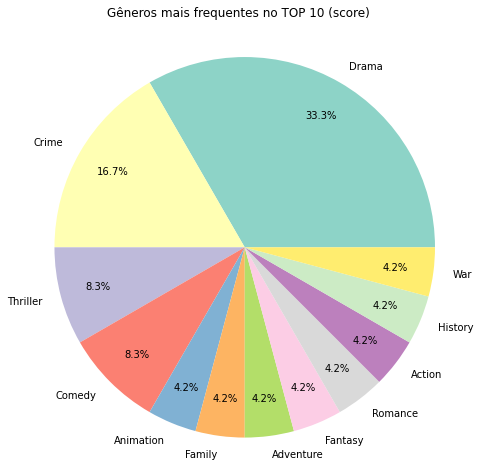

In [ ]:
# retirando valores nulos
df_top_score_gen = df_top_score_gen[df_top_score_gen > 0]

# formatação dos nomes para visualização
labels = [gen[7:] for gen in df_top_score_gen.index]

# plot
df_top_score_gen.plot.pie(autopct='%1.1f%%',
                          pctdistance=0.8,
                          radius=1.25,
                          labels=labels,
                          cmap=cmap)
plt.ylabel(' ')
plt.suptitle('Gêneros mais frequentes no TOP 10 (score)');

### TOP 10: popularidade

In [ ]:
# ordenando o dataframe pela popularidade
df['popularity'] = df['popularity'].astype(float) 
df_top_pop = df.sort_values(by='popularity',
                            ascending=False)

In [ ]:
# TOP 10: popularidade
df_top_pop[['original_title', 'score', 'popularity']].head(10)

,original_title,score,popularity
2020,Minions,6.385287,547.488298
469,Wonder Woman,7.158309,294.337037
1097,Beauty and the Beast,6.774673,287.253654
533,Baby Driver,7.104133,228.032744
90,Big Hero 6,7.749669,213.849907
263,Deadpool,7.378216,187.860492
163,Guardians of the Galaxy Vol. 2,7.542559,185.330992
443,Avatar,7.182347,185.070892
745,John Wick,6.968161,183.870374
58,Gone Girl,7.844593,154.801009


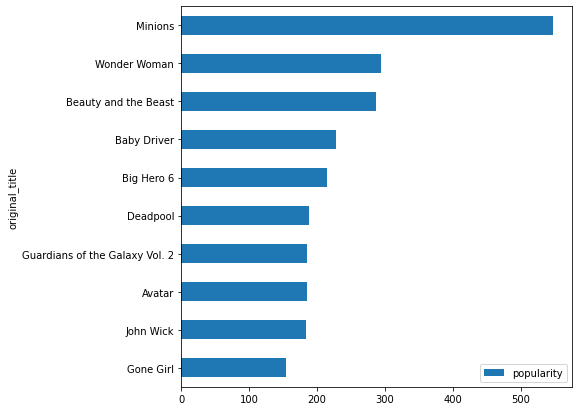

In [ ]:
# visualização dos filmes mais populares
df_top_pop[:10].plot.barh(x='original_title',
                          y=['popularity'])
plt.gca().invert_yaxis();

In [ ]:
# gênero de filmes no TOP 10 de popularity
df_top_pop_gen = df_top_pop[genres_attr]
df_top_pop_gen = df_top_pop_gen[:10].sum().sort_values(ascending=False)

# filtro em valores maiores que 0
df_top_pop_gen = df_top_pop_gen[df_top_pop_gen > 0]
df_top_pop_gen

genres_Action             7.0
genres_Adventure          6.0
genres_Comedy             4.0
genres_Family             3.0
genres_Fantasy            3.0
genres_Animation          2.0
genres_Thriller           2.0
genres_Science Fiction    2.0
genres_Romance            1.0
genres_Drama              1.0
genres_Crime              1.0
genres_Mystery            1.0
dtype: float64

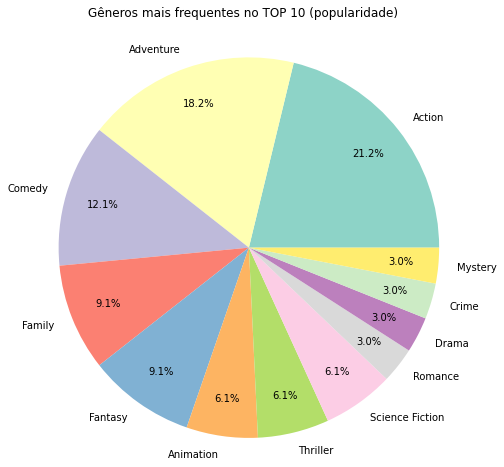

In [ ]:
# formatação dos nomes para visualização
labels = [gen[7:] for gen in df_top_pop_gen.index]

# plot
df_top_pop_gen.plot.pie(autopct='%1.1f%%',
                          pctdistance=0.8,
                          radius=1.25,
                          labels=labels,
                          cmap=cmap)
plt.ylabel(' ')
plt.suptitle('Gêneros mais frequentes no TOP 10 (popularidade)');

### TOP 10: receita

In [ ]:
# ordenando o dataframe pela receita
df['revenue'] = df['revenue']/1e6  # em milhões de dólares
df_top_rev = df.sort_values(by='revenue',
                            ascending=False)

In [ ]:
# TOP 10: receita
df_top_rev[['original_title', 'score', 'popularity', 'revenue']].head(10)

,original_title,score,popularity,revenue
443,Avatar,7.182347,185.070892,2787.965087
205,Star Wars: The Force Awakens,7.466804,31.626013,2068.223624
207,Titanic,7.465873,26.889070,1845.034188
262,The Avengers,7.379210,89.887648,1519.557910
1745,Jurassic World,6.489987,32.790475,1513.528810
376,Furious 7,7.246968,27.275687,1506.249360
354,Avengers: Age of Ultron,7.266830,37.379420,1405.403694
57,Harry Potter and the Deathly Hallows: Part 2,7.845627,24.990737,1342.000000
366,Frozen,7.258167,24.248243,1274.219009
1097,Beauty and the Beast,6.774673,287.253654,1262.886337


In [ ]:
# gênero de filmes no TOP 10 de revenue
df_top_rev_gen = df_top_rev[genres_attr]
df_top_rev_gen = df_top_rev_gen[:10].sum().sort_values(ascending=False)

# filtro em valores maiores que 0
df_top_rev_gen = df_top_rev_gen[df_top_rev_gen > 0]
df_top_rev_gen

genres_Adventure          7.0
genres_Action             6.0
genres_Science Fiction    5.0
genres_Fantasy            4.0
genres_Family             3.0
genres_Romance            2.0
genres_Thriller           2.0
genres_Animation          1.0
genres_Drama              1.0
dtype: float64

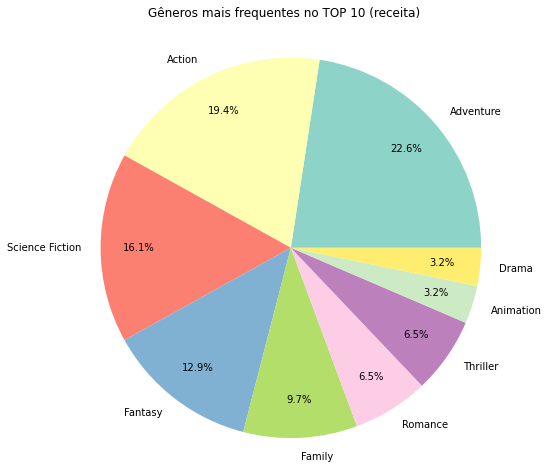

In [ ]:
# formatação dos nomes para visualização
labels = [gen[7:] for gen in df_top_rev_gen.index]

# plot
df_top_rev_gen.plot.pie(autopct='%1.1f%%',
                        pctdistance=0.8,
                        radius=1.25,
                        labels=labels,
                        cmap=cmap)
plt.ylabel(' ')
plt.suptitle('Gêneros mais frequentes no TOP 10 (receita)');